In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm


In [4]:
eur_df = pd.read_csv('eur_usd.csv')
eur_df

,date,value
0,1/1/2019,1.1465
1,1/2/2019,1.1338
2,1/3/2019,1.1394
3,1/4/2019,1.1396
4,1/5/2019,1.1396
...,...,...
334,1/27/2020,1.1018
335,1/28/2020,1.1023
336,1/29/2020,1.1012
337,1/30/2020,1.1034


In [5]:
new_eur_df = eur_df.truncate(after = 338)

In [6]:
new_eur_df
list(new_eur_df)

['date', ' value']

In [7]:
new_eur_df['up/down'] = new_eur_df[' value'].shift(1) - new_eur_df[' value']
new_eur_df

,date,value,up/down
0,1/1/2019,1.1465,NaN
1,1/2/2019,1.1338,0.0127
2,1/3/2019,1.1394,-0.0056
3,1/4/2019,1.1396,-0.0002
4,1/5/2019,1.1396,0.0000
...,...,...,...
334,1/27/2020,1.1018,0.0007
335,1/28/2020,1.1023,-0.0005
336,1/29/2020,1.1012,0.0011
337,1/30/2020,1.1034,-0.0022


C:\Users\Peter\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Peter\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1.,  0.,  0.,  1.,  0.,  3.,  3.,  2.,  3.,  6., 11., 11., 16.,
        26., 34., 99., 34., 24., 23., 17.,  7.,  5.,  4.,  2.,  1.,  1.,
         1.,  1.,  0.,  2.]),
 array([-0.0158    , -0.01477333, -0.01374667, -0.01272   , -0.01169333,
        -0.01066667, -0.00964   , -0.00861333, -0.00758667, -0.00656   ,
        -0.00553333, -0.00450667, -0.00348   , -0.00245333, -0.00142667,
        -0.0004    ,  0.00062667,  0.00165333,  0.00268   ,  0.00370667,
         0.00473333,  0.00576   ,  0.00678667,  0.00781333,  0.00884   ,
         0.00986667,  0.01089333,  0.01192   ,  0.01294667,  0.01397333,
         0.015     ]),
 <a list of 30 Patch objects>)

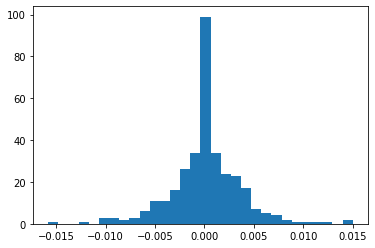

In [8]:
return_df = new_eur_df['up/down']
plt.hist(return_df, bins = 30)

In [9]:
return_df[return_df < 0] = -1
return_df[return_df > 0] = 1
return_df

C:\Users\Peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      NaN
1      1.0
2     -1.0
3     -1.0
4      0.0
      ... 
334    1.0
335   -1.0
336    1.0
337   -1.0
338   -1.0
Name: up/down, Length: 339, dtype: float64

In [10]:
new_eur_df['standard_ud'] = return_df
new_eur_df.head(30)

,date,value,up/down,standard_ud
0,1/1/2019,1.1465,NaN,NaN
1,1/2/2019,1.1338,1.0,1.0
2,1/3/2019,1.1394,-1.0,-1.0
3,1/4/2019,1.1396,-1.0,-1.0
4,1/5/2019,1.1396,0.0,0.0
5,1/7/2019,1.1476,-1.0,-1.0
6,1/8/2019,1.1440,1.0,1.0
7,1/9/2019,1.1546,-1.0,-1.0
8,1/10/2019,1.1499,1.0,1.0
9,1/11/2019,1.1470,1.0,1.0


53
135
150


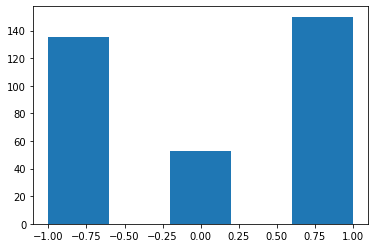

In [23]:
plt.hist(return_df, bins = 5)
print(new_eur_df.loc[new_eur_df.standard_ud == 0, 'standard_ud'].count())
print(new_eur_df.loc[new_eur_df.standard_ud == -1, 'standard_ud'].count())
print(new_eur_df.loc[new_eur_df.standard_ud == 1, 'standard_ud'].count())

In [87]:
dates = np.array(new_eur_df['date'])
dates = dates[1:]
change = np.array(new_eur_df['up/down'])
change = change[1:]
change = change.reshape(-1,1)
values = np.array(new_eur_df[' value'])
stuff = values
values = values.reshape(-1,1)
print(values)

[[1.1465]
 [1.1338]
 [1.1394]
 [1.1396]
 [1.1396]
 [1.1476]
 [1.144 ]
 [1.1546]
 [1.1499]
 [1.147 ]
 [1.147 ]
 [1.1468]
 [1.1406]
 [1.1396]
 [1.1388]
 [1.1372]
 [1.1372]
 [1.137 ]
 [1.1362]
 [1.1379]
 [1.1307]
 [1.14  ]
 [1.14  ]
 [1.1428]
 [1.1435]
 [1.1482]
 [1.1446]
 [1.1457]
 [1.1457]
 [1.1436]
 [1.1406]
 [1.1364]
 [1.1343]
 [1.1335]
 [1.1335]
 [1.1276]
 [1.1329]
 [1.1255]
 [1.1296]
 [1.1296]
 [1.1296]
 [1.131 ]
 [1.1338]
 [1.1345]
 [1.1339]
 [1.1342]
 [1.1342]
 [1.1358]
 [1.1392]
 [1.1372]
 [1.1369]
 [1.1378]
 [1.1378]
 [1.1339]
 [1.1301]
 [1.1308]
 [1.1192]
 [1.1239]
 [1.1239]
 [1.1264]
 [1.129 ]
 [1.1336]
 [1.1307]
 [1.1344]
 [1.1344]
 [1.1335]
 [1.1353]
 [1.1423]
 [1.1377]
 [1.132 ]
 [1.132 ]
 [1.1315]
 [1.1275]
 [1.125 ]
 [1.1229]
 [1.1232]
 [1.1232]
 [1.1209]
 [1.1204]
 [1.1242]
 [1.1223]
 [1.1233]
 [1.1233]
 [1.1257]
 [1.1266]
 [1.1276]
 [1.126 ]
 [1.132 ]
 [1.132 ]
 [1.1303]
 [1.1281]
 [1.1299]
 [1.1236]
 [1.1247]
 [1.1247]
 [1.1259]
 [1.1222]
 [1.1159]
 [1.1137]
 [1.1163]


In [88]:
# GaussianHMM Emissions
np.random.seed(42)

print("Training HMM...")
model = hmm.GaussianHMM(n_components = 3, covariance_type = "full", n_iter = 365)
model.fit(values)


Training HMM...


GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=3, n_iter=365, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

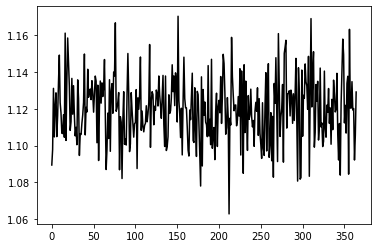

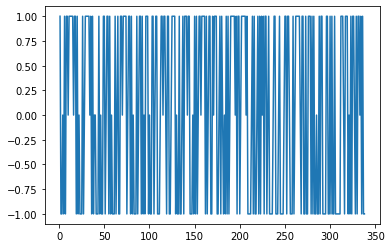

In [89]:
num_samples = 365
samples, _ = model.sample(num_samples)
plt.plot(np.arange(num_samples), samples[:,0], c = 'black')

plt.show()
plt.plot(new_eur_df['up'])

In [55]:
print(samples)
print(len(samples))

[[ 9.89272366e-01]
 [-9.91574764e-01]
 [ 9.91781853e-01]
 [ 1.01214724e+00]
 [ 1.17142899e-03]
 [-9.93038158e-01]
 [-9.95296789e-01]
 [ 2.56811416e-02]
 [ 9.83787136e-01]
 [-1.00424091e+00]
 [ 7.82150648e-03]
 [-1.01193015e+00]
 [ 1.01183128e+00]
 [ 1.00520841e+00]
 [ 9.97658931e-01]
 [-9.97346913e-01]
 [-2.96231888e-02]
 [-1.00438816e+00]
 [-1.01785080e+00]
 [ 9.97001588e-01]
 [ 9.85007698e-01]
 [-1.00191243e+00]
 [-1.02073745e+00]
 [-9.99152567e-01]
 [ 1.53945127e-02]
 [ 9.83169348e-01]
 [ 1.00449879e+00]
 [-9.90370200e-01]
 [ 1.01497392e+00]
 [ 9.92665462e-01]
 [ 9.95838071e-01]
 [ 1.00978845e+00]
 [-1.00679860e+00]
 [ 2.05779114e-02]
 [-1.00433048e+00]
 [-9.87178277e-01]
 [ 9.95772562e-01]
 [ 1.01825931e+00]
 [ 1.01130417e+00]
 [-5.79680732e-04]
 [-9.83376819e-01]
 [-9.99912454e-01]
 [ 1.00324807e+00]
 [-9.90597270e-01]
 [ 9.83436279e-03]
 [-9.91155013e-01]
 [-9.97243923e-01]
 [-1.00225972e+00]
 [-9.96866610e-01]
 [ 1.25742198e-02]
 [-9.90761834e-01]
 [-1.00229714e+00]
 [ 1.0027495

In [70]:
diff = []
for i in range(365):
    val = change[i] - samples[i][0]
    print(val[0])
    

0.01072763388251241
-0.008425236390649848
-1.991781853378443
-1.0121472403796872
-1.001171428993006
1.9930381582034764
-0.004703211239665994
0.9743188583834785
0.01621286361577612
1.0042409129150398
0.9921784935178044
2.0119301480727394
-0.011831282295004186
-0.005208405056981613
0.0023410685887212956
0.9973469131071413
1.0296231887901615
2.0043881636126284
0.01785080366875147
0.0029984121502238947
-1.9850076982780407
1.0019124332421112
0.020737453153761853
-0.0008474330016645659
-1.0153945127458428
0.016830651869552238
-2.004498787220438
0.9903702002626816
-0.014973915752021227
0.007334537721408352
0.004161929289044242
-0.00978844920860289
2.006798600757061
-0.0205779113963234
2.004330479349532
-0.01282172315371477
0.004227438359933555
-2.0182593099435255
-1.0113041701216297
0.0005796807322123254
-0.016623181481173477
-8.754579104741644e-05
-2.0032480679122866
1.9905972696805323
-1.0098343627853488
0.9911550132319586
-0.0027560767920929985
0.002259724266776786
1.9968666099143362
0.987

IndexError: index 338 is out of bounds for axis 0 with size 338